<a href="https://colab.research.google.com/github/MinjunChoi24/JustStudy/blob/main/Lecture_4_Introduction_to_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to pandas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

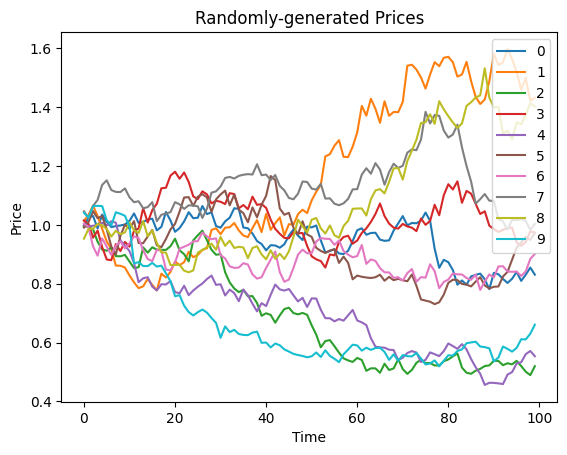

In [ ]:
returns= pd.DataFrame(np.random.normal(1.0,0.03,(100,10)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0)

# pandas Data Structures

In [ ]:
s = pd.Series([1,2,np.nan,4,5])
print(s)

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64


In [ ]:
print(s.name)

None


In [ ]:
s.name = "Toy series"
print(s.name)

Toy series


In [ ]:
print(s.index)

RangeIndex(start=0, stop=5, step=1)


In [ ]:
new_index  = pd.date_range("2016-01-01",periods=len(s),freq="D")
print(new_index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


In [ ]:
s.index= new_index
print(s.index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


In [ ]:
print("First element of the series:",s.iloc[0])
print("Last element of the series:", s.iloc[len(s)-1])

First element of the series: 1.0
Last element of the series: 5.0


In [ ]:
s.iloc[:2]

,Toy series
2016-01-01,1.0
2016-01-02,2.0


In [ ]:
start = 0
end = len(s)-1
step=1

s.iloc[start:end:step]

,Toy series
2016-01-01,1.0
2016-01-02,2.0
2016-01-03,NaN
2016-01-04,4.0


In [ ]:
s.iloc[::-1]

,Toy series
2016-01-05,5.0
2016-01-04,4.0
2016-01-03,NaN
2016-01-02,2.0
2016-01-01,1.0


In [ ]:
s.iloc[-2:-4:-1]

,Toy series
2016-01-04,4.0
2016-01-03,NaN


In [ ]:
s.loc['2016-01-01']

np.float64(1.0)

In [ ]:
s.loc['2016-01-02':'2016-01-04']

,Toy series
2016-01-02,2.0
2016-01-03,NaN
2016-01-04,4.0


In [ ]:
print(s<3)

2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
Freq: D, Name: Toy series, dtype: bool


In [ ]:
print(s.loc[s<3])

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy series, dtype: float64


In [ ]:
print(s.loc[(s<3) & (s>1)])

2016-01-02    2.0
Freq: D, Name: Toy series, dtype: float64


In [ ]:
import yfinance as yf # get_pricing -> yfinance

In [ ]:
symbol = "CMG"
start = "2012-01-01"
end = "2016-01-01"
data = yf.download(symbol, start=start, end=end,auto_adjust=True)
prices = data['Close']
prices.index = prices.index.tz_localize('UTC')
# prics = get_pricing(symbol,start_date=start,end_Date=end,fields ='price')

[*********************100%***********************]  1 of 1 completed


In [ ]:
prices = pd.Series(prices['CMG'])
print(prices.head(5))

Date
2012-01-03 00:00:00+00:00    6.8254
2012-01-04 00:00:00+00:00    6.9750
2012-01-05 00:00:00+00:00    7.0096
2012-01-06 00:00:00+00:00    6.9790
2012-01-09 00:00:00+00:00    6.7948
Name: CMG, dtype: float64


In [ ]:
monthly_prices = prices.resample('ME').median()
print(monthly_prices.head(10))

Date
2012-01-31 00:00:00+00:00    7.1101
2012-02-29 00:00:00+00:00    7.5639
2012-03-31 00:00:00+00:00    8.1799
2012-04-30 00:00:00+00:00    8.4167
2012-05-31 00:00:00+00:00    8.1048
2012-06-30 00:00:00+00:00    8.0490
2012-07-31 00:00:00+00:00    7.6094
2012-08-31 00:00:00+00:00    5.9078
2012-09-30 00:00:00+00:00    6.6562
2012-10-31 00:00:00+00:00    5.7312
Freq: ME, Name: CMG, dtype: float64


In [ ]:
def Custom_resampler(array_like):
  """Returns the first value of the period"""
  return array_like[0]
# first_of_month_prices = prices.resample('M',how=Custom_resampler)-> how가 사라짐
first_of_month_prices = prices.resample('MS').apply(Custom_resampler) # 함수를 적용하고 싶다면
first_of_month_prices = prices.resample('ME').first() # 첫번째 값만 반환
print(first_of_month_prices.head(10))

Date
2012-01-31 00:00:00+00:00    6.8254
2012-02-29 00:00:00+00:00    7.4082
2012-03-31 00:00:00+00:00    7.8820
2012-04-30 00:00:00+00:00    8.3680
2012-05-31 00:00:00+00:00    8.3978
2012-06-30 00:00:00+00:00    7.9428
2012-07-31 00:00:00+00:00    7.6692
2012-08-31 00:00:00+00:00    5.6134
2012-09-30 00:00:00+00:00    5.7198
2012-10-31 00:00:00+00:00    6.3226
Freq: ME, Name: CMG, dtype: float64


/tmp/ipython-input-1794083418.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return array_like[0]


In [ ]:
eastern_prices = prices.tz_convert('US/Eastern')
print(eastern_prices)

Date
2012-01-02 19:00:00-05:00    6.8254
2012-01-03 19:00:00-05:00    6.9750
2012-01-04 19:00:00-05:00    7.0096
2012-01-05 19:00:00-05:00    6.9790
2012-01-08 19:00:00-05:00    6.7948
                              ...  
2015-12-23 19:00:00-05:00    9.9020
2015-12-27 19:00:00-05:00    9.8704
2015-12-28 19:00:00-05:00    9.7988
2015-12-29 19:00:00-05:00    9.7158
2015-12-30 19:00:00-05:00    9.5970
Name: CMG, Length: 1006, dtype: float64


In [ ]:
calander_dates = pd.date_range(start=start,end=end,freq='D',tz='UTC') # 모든날짜 다 가져옴
print(calander_dates)

DatetimeIndex(['2012-01-01 00:00:00+00:00', '2012-01-02 00:00:00+00:00',
               '2012-01-03 00:00:00+00:00', '2012-01-04 00:00:00+00:00',
               '2012-01-05 00:00:00+00:00', '2012-01-06 00:00:00+00:00',
               '2012-01-07 00:00:00+00:00', '2012-01-08 00:00:00+00:00',
               '2012-01-09 00:00:00+00:00', '2012-01-10 00:00:00+00:00',
               ...
               '2015-12-23 00:00:00+00:00', '2015-12-24 00:00:00+00:00',
               '2015-12-25 00:00:00+00:00', '2015-12-26 00:00:00+00:00',
               '2015-12-27 00:00:00+00:00', '2015-12-28 00:00:00+00:00',
               '2015-12-29 00:00:00+00:00', '2015-12-30 00:00:00+00:00',
               '2015-12-31 00:00:00+00:00', '2016-01-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=1462, freq='D')


In [ ]:
calander_prices = prices.reindex(calander_dates,method='ffill')
print(calander_prices.head(15))

2012-01-01 00:00:00+00:00       NaN
2012-01-02 00:00:00+00:00       NaN
2012-01-03 00:00:00+00:00    6.8254
2012-01-04 00:00:00+00:00    6.9750
2012-01-05 00:00:00+00:00    7.0096
2012-01-06 00:00:00+00:00    6.9790
2012-01-07 00:00:00+00:00    6.9790
2012-01-08 00:00:00+00:00    6.9790
2012-01-09 00:00:00+00:00    6.7948
2012-01-10 00:00:00+00:00    6.8224
2012-01-11 00:00:00+00:00    6.9520
2012-01-12 00:00:00+00:00    6.9524
2012-01-13 00:00:00+00:00    7.0924
2012-01-14 00:00:00+00:00    7.0924
2012-01-15 00:00:00+00:00    7.0924
Freq: D, Name: CMG, dtype: float64


In [ ]:
meanfilled_prices = calander_prices.fillna(calander_prices.mean())
meanfilled_prices.head(10)

,CMG
2012-01-01 00:00:00+00:00,10.021364
2012-01-02 00:00:00+00:00,10.021364
2012-01-03 00:00:00+00:00,6.825400
2012-01-04 00:00:00+00:00,6.975000
2012-01-05 00:00:00+00:00,7.009600
2012-01-06 00:00:00+00:00,6.979000
2012-01-07 00:00:00+00:00,6.979000
2012-01-08 00:00:00+00:00,6.979000
2012-01-09 00:00:00+00:00,6.794800
2012-01-10 00:00:00+00:00,6.822400


In [ ]:
bfilled_prices = calander_prices.fillna(method='bfill')
bfilled_prices.head(10)

/tmp/ipython-input-1660110703.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bfilled_prices = calander_prices.fillna(method='bfill')


,CMG
2012-01-01 00:00:00+00:00,6.8254
2012-01-02 00:00:00+00:00,6.8254
2012-01-03 00:00:00+00:00,6.8254
2012-01-04 00:00:00+00:00,6.9750
2012-01-05 00:00:00+00:00,7.0096
2012-01-06 00:00:00+00:00,6.9790
2012-01-07 00:00:00+00:00,6.9790
2012-01-08 00:00:00+00:00,6.9790
2012-01-09 00:00:00+00:00,6.7948
2012-01-10 00:00:00+00:00,6.8224


In [ ]:
dropped_prices = calander_prices.dropna()
dropped_prices.head(10)

,CMG
2012-01-03 00:00:00+00:00,6.8254
2012-01-04 00:00:00+00:00,6.9750
2012-01-05 00:00:00+00:00,7.0096
2012-01-06 00:00:00+00:00,6.9790
2012-01-07 00:00:00+00:00,6.9790
2012-01-08 00:00:00+00:00,6.9790
2012-01-09 00:00:00+00:00,6.7948
2012-01-10 00:00:00+00:00,6.8224
2012-01-11 00:00:00+00:00,6.9520
2012-01-12 00:00:00+00:00,6.9524


Text(0, 0.5, 'Price')

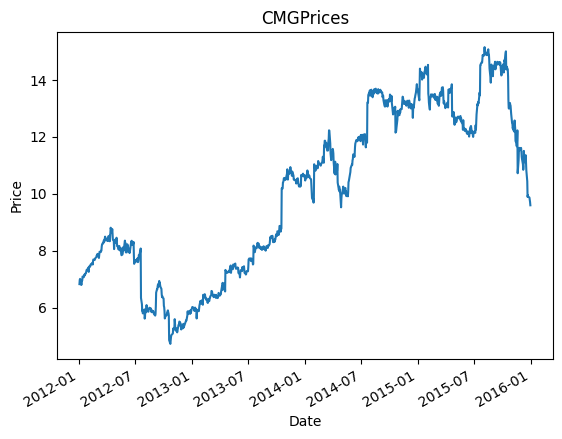

In [ ]:
prices.plot()
plt.title(symbol + "Prices")
plt.xlabel('Date')
plt.ylabel('Price')

In [ ]:
print("Mean: ", prices.mean())
print("Standard deviation: ", prices.std())

Mean:  10.032733014753278
Standard deviation:  2.933774744140719


In [ ]:
print("Summary Statistics")
print(prices.describe())

Summary Statistics
count    1006.000000
mean       10.032733
std         2.933775
min         4.724800
25%         7.431100
50%        10.425400
75%        12.936700
max        15.155400
Name: CMG, dtype: float64


In [ ]:
modified_prices = prices*2 -10
modified_prices.head(10)

,CMG
Date,
2012-01-03 00:00:00+00:00,3.6508
2012-01-04 00:00:00+00:00,3.9500
2012-01-05 00:00:00+00:00,4.0192
2012-01-06 00:00:00+00:00,3.9580
2012-01-09 00:00:00+00:00,3.5896
2012-01-10 00:00:00+00:00,3.6448
2012-01-11 00:00:00+00:00,3.9040
2012-01-12 00:00:00+00:00,3.9048
2012-01-13 00:00:00+00:00,4.1848


In [ ]:
noisy_prices = prices + 5 * pd.Series(np.random.normal(0,5,len(prices)),index=prices.index)+20
print(noisy_prices)

Date
2012-01-03 00:00:00+00:00    39.565061
2012-01-04 00:00:00+00:00    -6.213661
2012-01-05 00:00:00+00:00     8.135669
2012-01-06 00:00:00+00:00    63.081405
2012-01-09 00:00:00+00:00   -26.399597
                               ...    
2015-12-24 00:00:00+00:00    76.517693
2015-12-28 00:00:00+00:00    52.057707
2015-12-29 00:00:00+00:00     1.926475
2015-12-30 00:00:00+00:00    36.109151
2015-12-31 00:00:00+00:00    11.515061
Length: 1006, dtype: float64


In [ ]:
empty_series = prices + pd.Series(np.random.normal(0,1,len(prices)))
empty_series

,0
2012-01-03 00:00:00+00:00,NaN
2012-01-04 00:00:00+00:00,NaN
2012-01-05 00:00:00+00:00,NaN
2012-01-06 00:00:00+00:00,NaN
2012-01-09 00:00:00+00:00,NaN
...,...
1001,NaN
1002,NaN
1003,NaN
1004,NaN


In [ ]:
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

<Axes: title={'center': 'Multiplicative returns of CMG'}, xlabel='Date', ylabel='Return'>

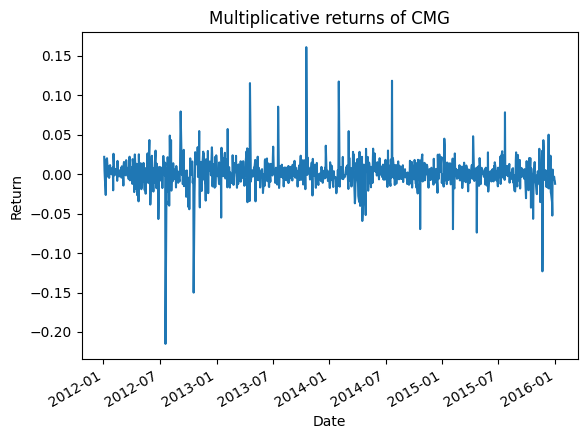

In [ ]:
plt.title("Multiplicative returns of " + symbol)
plt.xlabel("Date")
plt.ylabel("Return")
mult_returns.plot()

In [ ]:
rolling_mean = prices.rolling(window=30).mean()
rolling_mean.name = "30-day rolling mean"

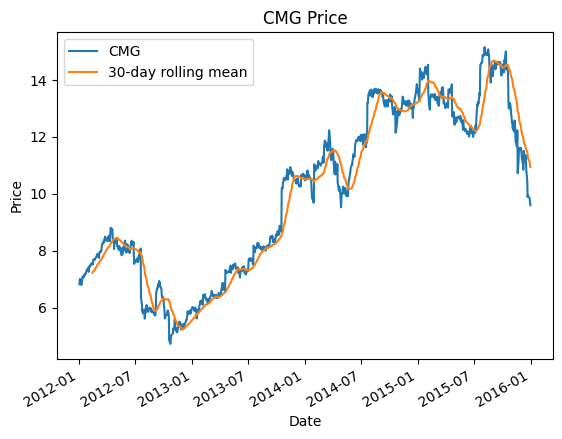

In [ ]:
prices.plot()
rolling_mean.plot()
plt.title(symbol + " Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

In [ ]:
rolling_std = prices.rolling(window=30).std()
rolling_std.name = "30-day rolling volatility"

Text(0, 0.5, 'Standard Deviation')

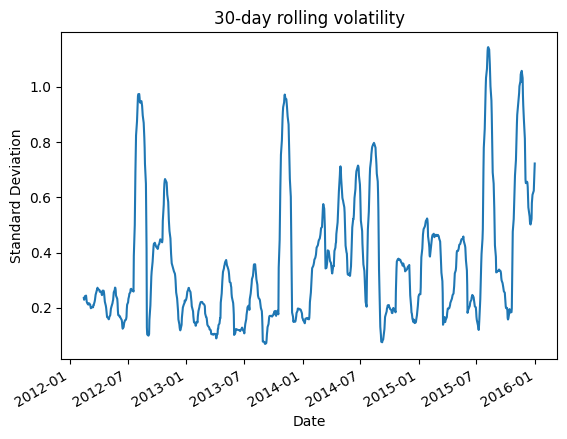

In [ ]:
rolling_std.plot()
plt.title(rolling_std.name)
plt.xlabel("Date")
plt.ylabel("Standard Deviation")

In [ ]:
print(np.median(mult_returns))

0.0002359792100385949


# DataFrames

In [ ]:
dict_data = {
    'a' : [1, 2, 3, 4, 5],
    'b' : ['L', 'K', 'J', 'M', 'Z'],
    'c' : np.random.normal(0, 1, 5)
}
print(dict_data)

{'a': [1, 2, 3, 4, 5], 'b': ['L', 'K', 'J', 'M', 'Z'], 'c': array([-0.63634885,  0.16414649,  1.53924667, -1.45453582, -0.76771534])}


In [ ]:
frame_data = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=5))
print(frame_data)

            a  b         c
2016-01-01  1  L -0.636349
2016-01-02  2  K  0.164146
2016-01-03  3  J  1.539247
2016-01-04  4  M -1.454536
2016-01-05  5  Z -0.767715


In [ ]:
s_1 = pd.Series([2,4,6,8,10],name='Evens')
s_2 = pd.Series([1,3,5,7,9],name="Odds")
numbers = pd.concat([s_1,s_2],axis=1)
print(numbers)

   Evens  Odds
0      2     1
1      4     3
2      6     5
3      8     7
4     10     9


In [ ]:
numbers.columns = ['Shmevens', 'Shmodds']
print(numbers)

   Shmevens  Shmodds
0         2        1
1         4        3
2         6        5
3         8        7
4        10        9


In [ ]:
print(numbers.index)

RangeIndex(start=0, stop=5, step=1)


In [ ]:
numbers.index = pd.date_range("2016-01-01", periods=len(numbers))
print(numbers)

            Shmevens  Shmodds
2016-01-01         2        1
2016-01-02         4        3
2016-01-03         6        5
2016-01-04         8        7
2016-01-05        10        9


In [ ]:
symbol = ["CMG", "MCD", "SHAK", "WMT"] # 'WFM'가 상장폐지됨에 따라 'WMT'로 대체
start = "2012-01-01"
end = "2016-01-01"

data = yf.download(symbol, start=start, end=end,auto_adjust=True)
prices = data['Close']
prices.name =symbol
print(prices.CMG.head())

[*********************100%***********************]  4 of 4 completed

Date
2012-01-03    6.8254
2012-01-04    6.9750
2012-01-05    7.0096
2012-01-06    6.9790
2012-01-09    6.7948
Name: CMG, dtype: float64



/tmp/ipython-input-3366330419.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  prices.name =symbol


In [ ]:
prices.index = prices.index.tz_localize('UTC')
print(prices.index)


DatetimeIndex(['2012-01-03 00:00:00+00:00', '2012-01-04 00:00:00+00:00',
               '2012-01-05 00:00:00+00:00', '2012-01-06 00:00:00+00:00',
               '2012-01-09 00:00:00+00:00', '2012-01-10 00:00:00+00:00',
               '2012-01-11 00:00:00+00:00', '2012-01-12 00:00:00+00:00',
               '2012-01-13 00:00:00+00:00', '2012-01-17 00:00:00+00:00',
               ...
               '2015-12-17 00:00:00+00:00', '2015-12-18 00:00:00+00:00',
               '2015-12-21 00:00:00+00:00', '2015-12-22 00:00:00+00:00',
               '2015-12-23 00:00:00+00:00', '2015-12-24 00:00:00+00:00',
               '2015-12-28 00:00:00+00:00', '2015-12-29 00:00:00+00:00',
               '2015-12-30 00:00:00+00:00', '2015-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=1006, freq=None)


In [ ]:
prices.loc[:,'CMG'].head()

,CMG
Date,
2012-01-03 00:00:00+00:00,6.8254
2012-01-04 00:00:00+00:00,6.9750
2012-01-05 00:00:00+00:00,7.0096
2012-01-06 00:00:00+00:00,6.9790
2012-01-09 00:00:00+00:00,6.7948


In [ ]:
print(type(prices.CMG))
print(type(prices.loc[:, 'CMG']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
prices.loc[:, ['CMG', 'MCD']].head()

Ticker,CMG,MCD
Date,,
2012-01-03 00:00:00+00:00,6.8254,67.930649
2012-01-04 00:00:00+00:00,6.9750,68.308632
2012-01-05 00:00:00+00:00,7.0096,68.611046
2012-01-06 00:00:00+00:00,6.9790,69.140228
2012-01-09 00:00:00+00:00,6.7948,68.480469


In [ ]:
prices.loc['2015-12-15':'2015-12-22']

Ticker,CMG,MCD,SHAK,WMT
Date,,,,
2015-12-15 00:00:00+00:00,11.0972,91.661179,41.580002,16.569273
2015-12-16 00:00:00+00:00,11.3566,92.374542,40.169998,16.752626
2015-12-17 00:00:00+00:00,11.0978,92.108009,38.540001,16.385912
2015-12-18 00:00:00+00:00,10.8216,91.449562,39.750000,16.349791
2015-12-21 00:00:00+00:00,10.4402,92.256973,38.189999,16.544266
2015-12-22 00:00:00+00:00,9.8922,92.280457,39.750000,16.819304


In [ ]:
prices.loc['2015-12-15':'2015-12-22', ['CMG', 'MCD']]

Ticker,CMG,MCD
Date,,
2015-12-15 00:00:00+00:00,11.0972,91.661179
2015-12-16 00:00:00+00:00,11.3566,92.374542
2015-12-17 00:00:00+00:00,11.0978,92.108009
2015-12-18 00:00:00+00:00,10.8216,91.449562
2015-12-21 00:00:00+00:00,10.4402,92.256973
2015-12-22 00:00:00+00:00,9.8922,92.280457


In [ ]:
prices.iloc[0:2, 1]

,MCD
Date,
2012-01-03 00:00:00+00:00,67.930649
2012-01-04 00:00:00+00:00,68.308632


In [ ]:
# Access prices with integer index in
# [1, 3, 5, 7, 9, 11, 13, ..., 99]
# and in column 0 or 3
prices.iloc[[1, 3, 5] + list(range(7, 100, 2)), [0, 3]].head(20)

Ticker,CMG,WMT
Date,,
2012-01-04 00:00:00+00:00,6.9750,14.998131
2012-01-06 00:00:00+00:00,6.9790,14.819788
2012-01-10 00:00:00+00:00,6.8224,14.829837
2012-01-12 00:00:00+00:00,6.9524,14.945377
2012-01-17 00:00:00+00:00,7.0676,15.033303
2012-01-19 00:00:00+00:00,7.1618,15.224195
2012-01-23 00:00:00+00:00,7.2092,15.299550
2012-01-25 00:00:00+00:00,7.2628,15.440215
2012-01-27 00:00:00+00:00,7.3352,15.249317


In [ ]:
prices.loc[prices.MCD > prices.WMT].head()

Ticker,CMG,MCD,SHAK,WMT
Date,,,,
2012-01-03 00:00:00+00:00,6.8254,67.930649,NaN,15.153870
2012-01-04 00:00:00+00:00,6.9750,68.308632,NaN,14.998131
2012-01-05 00:00:00+00:00,7.0096,68.611046,NaN,14.925283
2012-01-06 00:00:00+00:00,6.9790,69.140228,NaN,14.819788
2012-01-09 00:00:00+00:00,6.7948,68.480469,NaN,14.865005


In [ ]:
prices.loc[(prices.MCD > prices.WMT) & ~prices.SHAK.isnull()].head()

Ticker,CMG,MCD,SHAK,WMT
Date,,,,
2015-01-30 00:00:00+00:00,14.1968,70.049088,45.900002,22.970554
2015-02-02 00:00:00+00:00,14.2510,70.102150,43.990002,23.167883
2015-02-03 00:00:00+00:00,14.5326,71.170601,44.980000,23.297625
2015-02-04 00:00:00+00:00,13.5200,71.269127,41.320000,23.421967
2015-02-05 00:00:00+00:00,13.4182,71.488861,42.639999,23.592253


In [ ]:
s_1 = yf.download('TSLA', start=start, end=end,auto_adjust=True)
s_1 = s_1['Close']
s_1.index = prices.index
prices.loc[:, 'TSLA'] = s_1
prices.head(5)

[*********************100%***********************]  1 of 1 completed


Ticker,CMG,MCD,SHAK,WMT,TSLA
Date,,,,,
2012-01-03 00:00:00+00:00,6.8254,67.930649,NaN,15.153870,1.872000
2012-01-04 00:00:00+00:00,6.9750,68.308632,NaN,14.998131,1.847333
2012-01-05 00:00:00+00:00,7.0096,68.611046,NaN,14.925283,1.808000
2012-01-06 00:00:00+00:00,6.9790,69.140228,NaN,14.819788,1.794000
2012-01-09 00:00:00+00:00,6.7948,68.480469,NaN,14.865005,1.816667


In [ ]:
prices = prices.drop('TSLA', axis=1)
prices.head(5)

Ticker,CMG,MCD,SHAK,WMT
Date,,,,
2012-01-03 00:00:00+00:00,6.8254,67.930649,NaN,15.153870
2012-01-04 00:00:00+00:00,6.9750,68.308632,NaN,14.998131
2012-01-05 00:00:00+00:00,7.0096,68.611046,NaN,14.925283
2012-01-06 00:00:00+00:00,6.9790,69.140228,NaN,14.819788
2012-01-09 00:00:00+00:00,6.7948,68.480469,NaN,14.865005


In [ ]:
df_1 = yf.download(['SPY', 'VXX'], start=start, end=end,auto_adjust=True)
df_1 = df_1['Close']
df_1.index = prices.index

df_2 = yf.download(['MSFT', 'AAPL', 'GOOG'], start=start, end=end,auto_adjust=True)
df_2 = df_2['Close']
df_2.index = prices.index

df_3 = pd.concat([df_1, df_2], axis=1)
df_3.head()

[*********************100%***********************]  2 of 2 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VXX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2012-01-01 -> 2016-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1325394000, endDate = 1451624400")')
[*********************100%***********************]  3 of 3 completed


Ticker,SPY,VXX,AAPL,GOOG,MSFT
Date,,,,,
2012-01-03 00:00:00+00:00,99.583420,NaN,12.333218,16.449753,20.965437
2012-01-04 00:00:00+00:00,99.739647,NaN,12.399499,16.520702,21.458839
2012-01-05 00:00:00+00:00,100.005188,NaN,12.537153,16.291538,21.678122
2012-01-06 00:00:00+00:00,99.747459,NaN,12.668219,16.069296,22.014885
2012-01-09 00:00:00+00:00,99.989563,NaN,12.648123,15.387977,21.725109


In [ ]:
dropped_prices = prices.dropna()
dropped_prices.head(5)

Ticker,CMG,MCD,SHAK,WMT
Date,,,,
2015-01-30 00:00:00+00:00,14.1968,70.049088,45.900002,22.970554
2015-02-02 00:00:00+00:00,14.2510,70.102150,43.990002,23.167883
2015-02-03 00:00:00+00:00,14.5326,71.170601,44.980000,23.297625
2015-02-04 00:00:00+00:00,13.5200,71.269127,41.320000,23.421967
2015-02-05 00:00:00+00:00,13.4182,71.488861,42.639999,23.592253


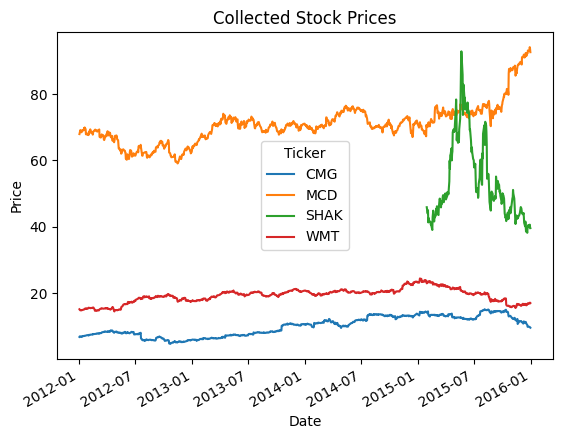

In [ ]:
prices.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date");

In [ ]:
prices.mean(axis=0)

,0
Ticker,
CMG,10.032733
MCD,70.891131
SHAK,53.575708
WMT,19.305358


In [ ]:
prices.std(axis=0)

,0
Ticker,
CMG,2.933775
MCD,6.013020
SHAK,11.968587
WMT,2.108270


In [ ]:
prices.describe()

Ticker,CMG,MCD,SHAK,WMT
count,1006.000000,1006.000000,233.000000,1006.000000
mean,10.032733,70.891131,53.575708,19.305358
std,2.933775,6.013020,11.968587,2.108270
min,4.724800,59.088333,38.189999,14.504291
25%,7.431100,68.063654,44.119999,17.973155
50%,10.425400,70.599831,49.270000,19.721828
75%,12.936700,73.658119,61.669998,20.497821
max,15.155400,94.122627,92.860001,24.454531


In [ ]:
(2 * prices - 50).head(5)

Ticker,CMG,MCD,SHAK,WMT
Date,,,,
2012-01-03 00:00:00+00:00,-36.3492,85.861298,NaN,-19.692261
2012-01-04 00:00:00+00:00,-36.0500,86.617264,NaN,-20.003738
2012-01-05 00:00:00+00:00,-35.9808,87.222092,NaN,-20.149433
2012-01-06 00:00:00+00:00,-36.0420,88.280457,NaN,-20.360424
2012-01-09 00:00:00+00:00,-36.4104,86.960938,NaN,-20.269989


In [ ]:
mult_returns = prices.pct_change()[1:]
mult_returns.head()

Ticker,CMG,MCD,SHAK,WMT
Date,,,,
2012-01-04 00:00:00+00:00,0.021918,0.005564,NaN,-0.010277
2012-01-05 00:00:00+00:00,0.004961,0.004427,NaN,-0.004857
2012-01-06 00:00:00+00:00,-0.004365,0.007713,NaN,-0.007068
2012-01-09 00:00:00+00:00,-0.026394,-0.009542,NaN,0.003051
2012-01-10 00:00:00+00:00,0.004062,0.000602,NaN,-0.002366


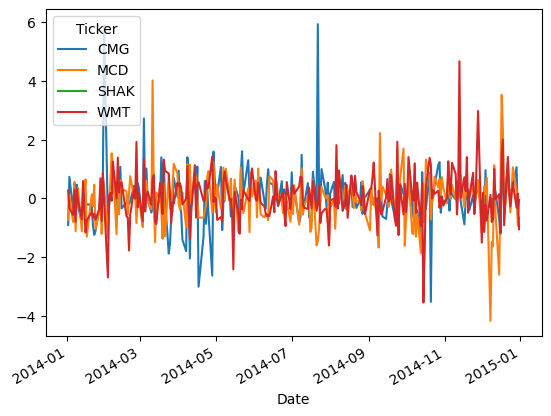

In [ ]:
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.loc['2014-01-01':'2015-01-01'].plot();

In [ ]:
rolling_mean = prices.rolling(window=30).mean()
rolling_mean.columns = prices.columns

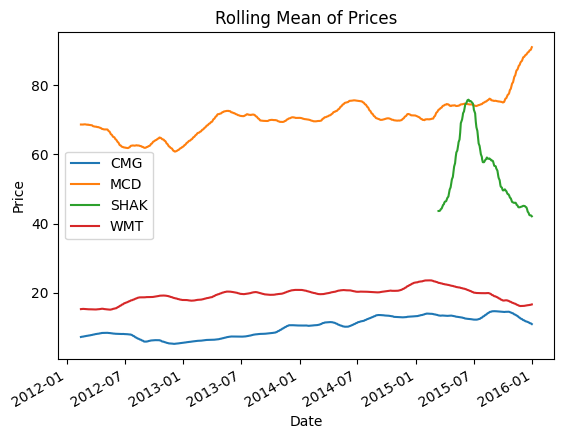

In [ ]:
rolling_mean.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();